In [1]:
# Import liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import dataset
df = pd.read_csv('Loan-nuclei.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# Frequency Table of categorical column

df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:>

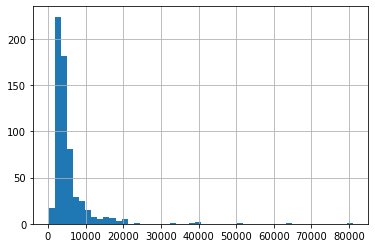

In [7]:
df['ApplicantIncome'].hist(bins=50)

<AxesSubplot:>

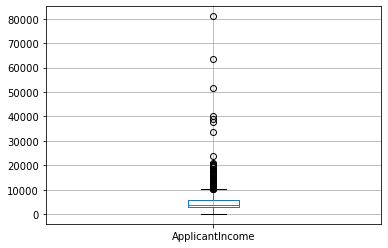

In [8]:
df.boxplot(column='ApplicantIncome')

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

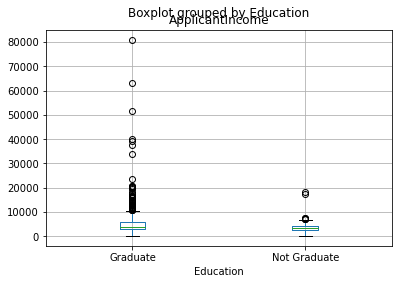

In [9]:
df.boxplot(column='ApplicantIncome', by = 'Education')

<AxesSubplot:>

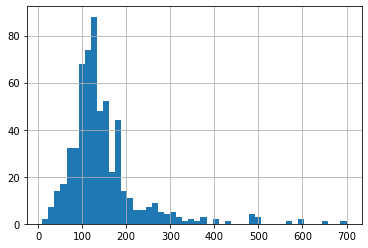

In [10]:
df['LoanAmount'].hist(bins=50)   # (Right Skwed or positive skwed)

<AxesSubplot:>

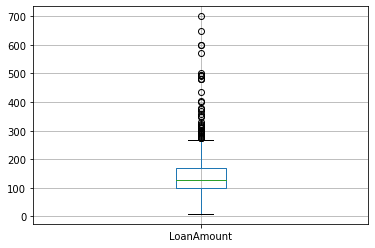

In [11]:
df.boxplot(column='LoanAmount')

In [12]:
temp1=df['Credit_History'].value_counts(ascending=True)
temp2=df.pivot_table(values='Loan_Status', index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History :' )
print(temp1 )
print('\nProbability of getting loan for each Credit history class:' )
print(temp2)

Frequency Table for Credit History :
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit history class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


<AxesSubplot:title={'center':'Probability of getting loan by Credit History'}, xlabel='Credit_History', ylabel='Probability of getting loan'>

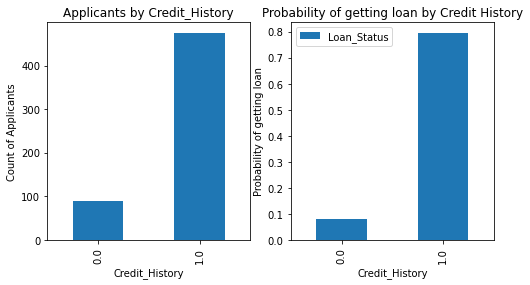

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar', ax=ax1)

ax2 = fig.add_subplot(122)

ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by Credit History")
temp2.plot(kind = 'bar', ax=ax2)

In [14]:
# Check for missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
# loan amt(numerical) column fill missing values with mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [16]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
# Filling categorical missing values
# cheking the frequency on the data and replace with mode
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
df['Self_Employed'].fillna('No', inplace=True)

In [19]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [21]:
df['Gender'].fillna('Male', inplace=True)

In [22]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [23]:
df['Married'].fillna('Yes', inplace=True)

In [24]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [25]:
df['Dependents'].fillna("0", inplace=True)

In [26]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [27]:
df['Loan_Amount_Term'].fillna('360.0', inplace=True)

In [28]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [29]:
df['Credit_History'].fillna(1.0, inplace=True)

In [30]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

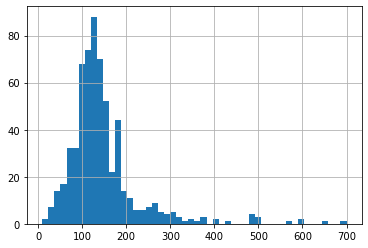

In [31]:
# skewd column convert into normal distribution with the help of log function

df['LoanAmount'].hist(bins=50)

In [32]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])

<AxesSubplot:>

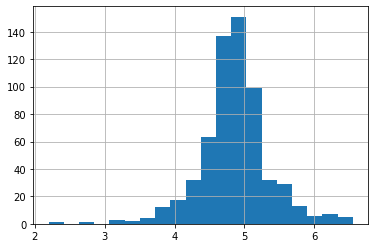

In [33]:
df['LoanAmount_log'].hist(bins=20)

In [34]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

<AxesSubplot:>

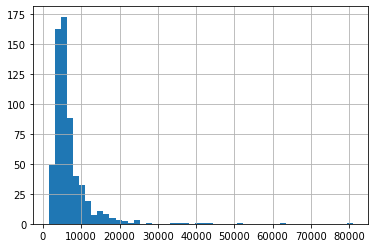

In [35]:
df['TotalIncome'].hist(bins=50)

In [36]:
df['TotalIncome_log'] = np.log(df['TotalIncome'])

<AxesSubplot:>

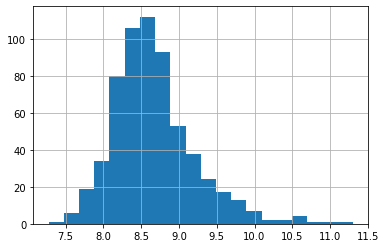

In [37]:
df['TotalIncome_log'].hist(bins=20)

In [38]:
# Checking data types   
# while enconding the columns dtypes should be int or float

df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History       float64
Property_Area         object
Loan_Status           object
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [39]:
var_mod = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [40]:
from sklearn.preprocessing import LabelEncoder
# converting object datatypes columns into int
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i].astype(str))

In [41]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History       float64
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [42]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360,1.0,2,1,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360,1.0,0,1,4.262680,2900.0,7.972466
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180,1.0,0,1,3.688879,4106.0,8.320205
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360,1.0,2,1,5.533389,8312.0,9.025456
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360,1.0,2,1,5.231109,7583.0,8.933664


In [43]:
#Import models from scikit learn module: 
from sklearn.linear_model import LogisticRegression 
#from sklearn.cross_validation import KFold  
from sklearn.model_selection import KFold 
#new versions of python support this, if old then use above comment 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier #export_graphviz 
from sklearn import metrics 

In [44]:
#Generic function for making a classification model and accessing performance: 
def classification_model(model, data, predictors, outcome):  
    #Fit the model:  
    model.fit(data[predictors],data[outcome])    
    #Make predictions on training set:  
    predictions = model.predict(data[predictors])    
    #Print accuracy  
    accuracy = metrics.accuracy_score(predictions,data[outcome])  
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
    #Perform k-fold cross-validation with 5 folds  
    kf = KFold(5,shuffle=True)  
    cv_accu = []  
    for train, test in kf.split(data):
        # Filter training data    
        train_predictors = (data[predictors].iloc[train,:])    #X_train    
        # The target we're using to train the algorithm.    
        train_target = data[outcome].iloc[train]        #Y_train
        # Training the algorithm using the predictors and target.    
        model.fit(train_predictors, train_target)        
        #Record accuracy from each cross-validation run    
        cv_accu.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(cv_accu))) 
    # %s is placeholder for data from format, next % is used to conert it into percentage
    #.3% is no. of decimals


In [45]:
outcome_var = 'Loan_Status' 
model = LogisticRegression() 
predictor_var = ['Credit_History']  
classification_model(model, df,predictor_var,outcome_var) 

Accuracy : 80.945%
Cross-Validation Score : 80.945%


In [46]:
#We can try different combination of variables: 
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area'] 
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.942%


In [47]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education'] 
classification_model(model, df,predictor_var,outcome_var) 

Accuracy : 80.945%
Cross-Validation Score : 80.944%


In [48]:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log'] 
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 89.414%
Cross-Validation Score : 71.174%


In [49]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.820%


In [50]:
#Create a series with feature importances: 
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False) 
print(featimp)

TotalIncome_log     0.270319
Credit_History      0.263116
LoanAmount_log      0.226311
Dependents          0.052335
Property_Area       0.049604
Loan_Amount_Term    0.044781
Married             0.026679
Education           0.025986
Gender              0.022487
Self_Employed       0.018381
dtype: float64


In [51]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1) 
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area'] 
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 83.225%
Cross-Validation Score : 80.456%
